In [1]:
# To perform operations on dataset

import pandas as pd

import numpy as np



# Machine learning model

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier



# Visualization

from sklearn import metrics

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('dataset.csv')

dot_file = 'tree.dot'

confusion_matrix_file = 'confusion_matrix.png'

In [3]:
print(df.head())

   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1               

In [4]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [5]:
model = DecisionTreeClassifier()

model.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [6]:
ypred = model.predict(Xtest)

print(metrics.classification_report(ypred, ytest))

print("\n\nAccuracy Score:", metrics.accuracy_score(ytest, ypred).round(2)*100, "%")

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94      1231
           1       0.96      0.95      0.95      1533

    accuracy                           0.95      2764
   macro avg       0.95      0.95      0.95      2764
weighted avg       0.95      0.95      0.95      2764



Accuracy Score: 95.0 %


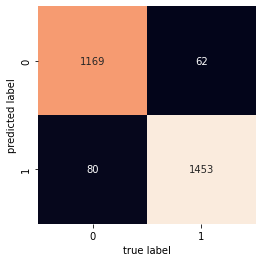

In [7]:
mat = confusion_matrix(ytest, ypred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')

plt.ylabel('predicted label');

plt.savefig(confusion_matrix_file)

In [8]:
export_graphviz(model, out_file=dot_file, feature_names=X.columns.values)